In [21]:
#Group 5 Members:
#Atheer Alhejaily
#Raghad Almeataz
#Abdullah Albutih
#Mashael Aljohani

import numpy as np
import random
from matplotlib import pyplot as plt
#import seaborn as sns
#below function performs simulation of actual code
def Total_revenue_of_branch_per_day(simulation=1):
    #start simulation process
    for s in range(simulation):
        #variables declaration and assignments
        ticket_cost_adult = 30
        ticket_cost_child = 20
        ticket_cost_seniors = 25
        movies={1:["Gemini",12],2:["Hamilton",12],3:["The Invisible Man",13],4:["The Assistant",20],5:["The Vast of Night",6]}# dictionary of 5 favorite movies
        screens = 5 ##How many screens does each theater hold
        seats =  70 #How many seats does each theater hold
        snack = 25 #the snack cost
        rep7=np.repeat(np.arange(1,8),1)
        rep8=np.repeat(np.arange(0,8),1)
        rep9=np.repeat(np.arange(0,8),1)
        rep10=np.repeat(np.arange(0,4),1)
        rep11=np.repeat(np.arange(0,2),1)
        rep12=np.repeat(np.arange(0,4),1)
        rep13=np.repeat(np.arange(0,4),1)
        rep14=np.repeat(np.arange(1,8),1)
        week_days = rep7
        global Branch_name
        global Branches
        global days
        days = ["Sunday" , "Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday"]
        Branches= list(["Main","Mall","Compound","Walkway"])
        global total_revenue_per_day
        global snack_revenue_per_day
        global ticket_revenue_per_day
        global Revenue_per_Branch
        global Revenue_Percentages
        global Total_snack_revenue_per_branch
        global Total_ticket_revenue_per_branch
        global total_revenue_per_simulation
        ticket_revenue_per_day= rep7
        total_revenue_per_day=rep9
        snack_revenue_per_day=rep8
        Revenue_per_Branch=rep10
        Revenue_Percentages=rep11
        Total_snack_revenue_per_branch=rep12
        Total_ticket_revenue_per_branch=rep13
        total_revenue_per_simulation=rep14
        global k
        #branch iteration
        for k in range (len(Branches)):
            #compound and Walkway branches have less seats
                if(k==2 or k==3):
                    seats=35
                #days iteration    
                for i in range (0,len(week_days)):
                        ticket_revenue_per_day[i] = 0
                        snack_revenue_per_day[i] = 0
                        total_revenue_per_day[i]= 0
                        week_days[i] = i
                        total_revenue = 0
                        #apply discount on fridays
                        if i==5:
                            ticket_cost_seniors=ticket_cost_seniors-(ticket_cost_seniors*0.10)
                        else:
                            ticket_cost_seniors=25
                        #movies iteration
                        for j in range(1,len(movies.keys())):
                            #seats are given to adults first, then senior citizens,then children
                            visitors_adults = np.random.choice(seats)
                            if (visitors_adults>0):
                                visitors_adults_snack = np.random.choice(visitors_adults)
                                visitors_seniors = np.random.choice(seats-visitors_adults)
                                if (visitors_seniors>0):
                                    visitors_seniors_snack = np.random.choice(visitors_seniors)
                                    visitors_remain =  seats - visitors_adults- visitors_seniors
                                    visitors_seniors_snack = np.random.choice(visitors_seniors)
                                if (visitors_seniors_snack>0):
                                    visitors_remain =  seats - visitors_seniors
                                #check age restriction then calculate costs
                                if (movies[j][1]<13):
                                    visitors_children = np.random.choice(visitors_remain)
                                    if (visitors_children>0):
                                        visitors_children_snack = np.random.choice(visitors_children)
                                        total_seat = visitors_children + visitors_adults + visitors_seniors
                                        adult_cost = visitors_adults*ticket_cost_adult
                                        seniors_cost = visitors_seniors*ticket_cost_seniors
                                        child_cost = visitors_children*ticket_cost_child
                                        total_revenue =+ (adult_cost  + child_cost+ seniors_cost)
                                        snack_total =(visitors_adults_snack*snack)+(visitors_children_snack*snack)+(visitors_seniors_snack*snack)

                                else:
                                    total_seat =visitors_adults+visitors_seniors
                                    adult_cost = visitors_adults*ticket_cost_adult
                                    seniors_cost = visitors_seniors*ticket_cost_seniors
                                    total_revenue =+ adult_cost+seniors_cost
                                    snack_total = (visitors_adults_snack*snack)+(visitors_seniors_snack*snack)
            #assign weekly values    
                                ticket_revenue_per_day[i] = total_revenue 
                                snack_revenue_per_day[i] = snack_total
                                total_revenue_per_day[i]= total_revenue+snack_total
                                total_revenue_per_simulation[i]=+(total_revenue_per_day[i])+total_revenue_per_simulation[i]
                        #print(total_revenue_per_simulation)
                Total_snack_revenue_per_branch[k] = np.sum(snack_revenue_per_day)
                Total_ticket_revenue_per_branch[k] = np.sum(ticket_revenue_per_day)
                #print(total_revenue_per_day.index(max(total_revenue_per_day)))
                Revenue_per_Branch[k] = np.sum(total_revenue_per_day)
#plot simulation chart
def simulation():
    day_max=np.argmax(total_revenue_per_simulation)
    days = ["Sunday" , "Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday"]
    plt.figure(figsize=(18,7)) 
    plt.title('The highest summed day revenue after simulation\n',fontsize=30)
    plt.barh(days,total_revenue_per_simulation,color=("lightgrey", "darkcyan","lightgrey","darkcyan","lightgrey", "darkcyan","lightgrey"))
    plt.ylabel('Days', fontsize='17', horizontalalignment='center')
    plt.xlabel('Revenues', fontsize='17', horizontalalignment='center')
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.show()
    print("Day returned the highest summed revenue after simulation is",days[day_max])

#plot Branches revenue chart
def Branches_revenue():
            Branches= ["Main","Mall","Compound","Walkway"]
            Snack = Total_snack_revenue_per_branch
            Ticket = Total_ticket_revenue_per_branch
            Revenue= Revenue_per_Branch
            X_axis = np.arange(len(Branches))
            plt.figure(figsize=(18,7)) 
            plt.title('Branches Revenue over a Week\n', fontsize=30)
            plt.xlabel('Branches', fontsize='17', horizontalalignment='center')
            plt.ylabel('Revenues', fontsize='17', horizontalalignment='center')
            plt.bar(X_axis - 0.2, Snack, 0.3, label = 'Snack',color="lightgrey")
            plt.bar(X_axis + 0.3, Ticket, 0.3, label = 'Ticket',color="lightseagreen")
            plt.bar(X_axis + 0.1, Revenue, 0.3, label = 'Revenue',color="darkcyan")
            plt.xticks(size = 20)
            plt.yticks(size = 20)  
            plt.xticks(X_axis, Branches)
            plt.legend(fontsize=15)
            plt.show()
            Branch_name=np.argmax(Revenue_per_Branch)
            print("The",Branches[Branch_name],"is the highest branch with total revenue of",np.max(Revenue_per_Branch),"$")

#plot ticket and snacks revenue over Branches chart
def pie_chart():
        #Calculate the percentage of income from snacks (snack/total*100).
        Revenue_Percentages[0] =(round(sum(Total_snack_revenue_per_branch)/sum(Revenue_per_Branch)*100))
        #Calculate the percentage of income from ticket ((ticket)/total*100).
        Revenue_Percentages[1]=(round((sum(Total_ticket_revenue_per_branch))/sum(Revenue_per_Branch)*100))
        #Show the percentage of income from snacks and ticket in pie chart.
        revenue_names=["Snacks","Tickets"]
        textprops = {"fontsize":20}
        col=['lightgrey','darkcyan']
        plt.title('Pie Chart of Revenue Percentages for all Branches\n\n\n', fontsize=30)
        plt.pie(Revenue_Percentages,labels=revenue_names,autopct='%2.0f%%',colors=col,shadow = True,radius = 2,textprops=textprops)
        plt.show() 


In [22]:
Total_revenue_of_branch_per_day()


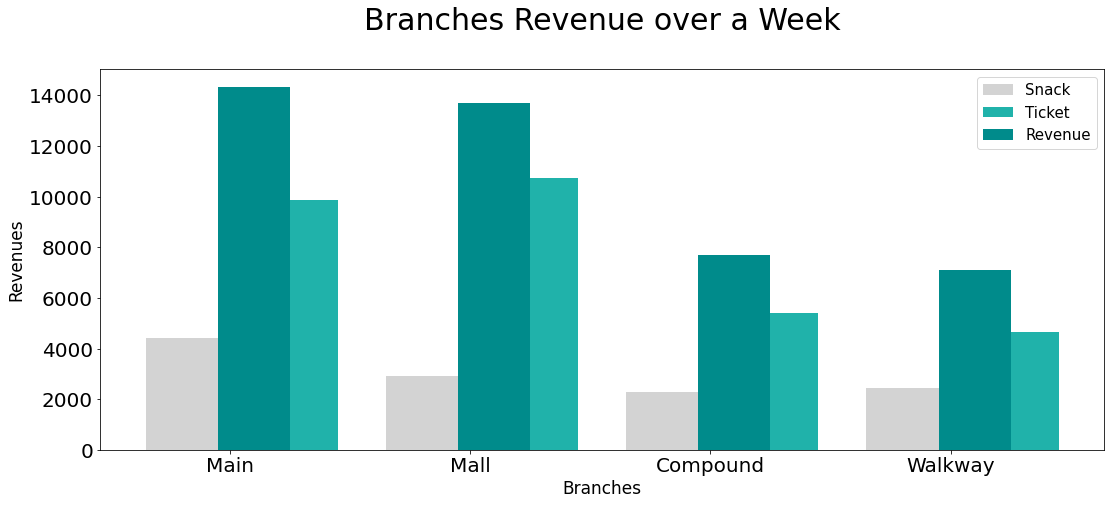

The Main is the highest branch with total revenue of 14314 $


In [23]:
Branches_revenue()


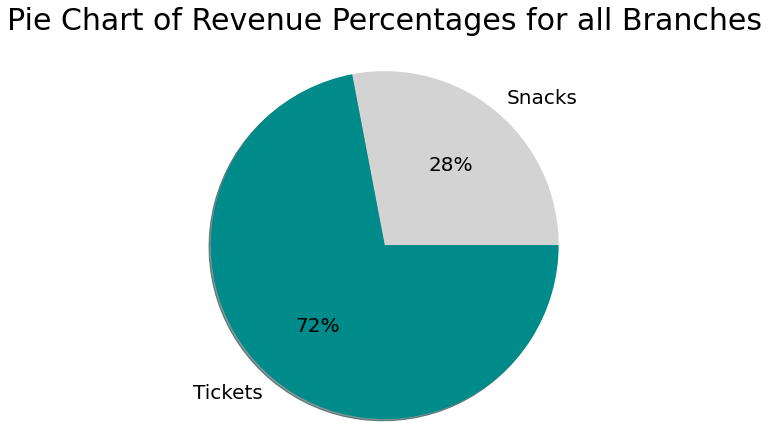

In [25]:
pie_chart()

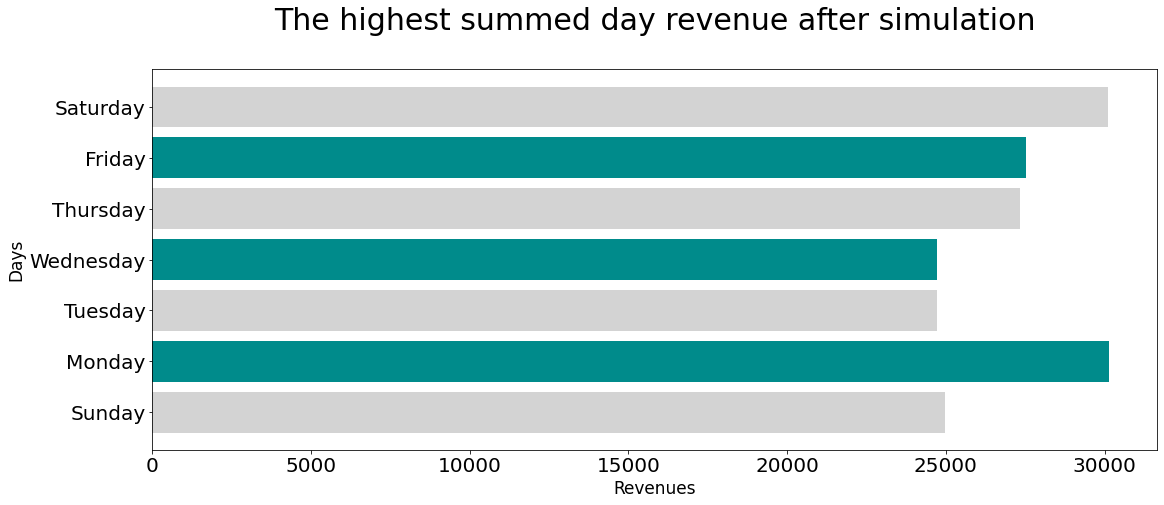

Day returned the highest summed revenue after simulation is Monday


In [26]:
Total_revenue_of_branch_per_day()
simulation()